In [1]:
import torch
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

In [2]:
def Triplet_Map_std(projection=0, entanglement=1, lr=0.1, N=20, figure_size=8, s=2, title_size=28, save=False):
    # similarity of ap and an
    S_ap = torch.linspace(0,1,N).repeat(N,1) 
    S_an = torch.linspace(1,0,N).repeat(N,1).t()

    # p,n vertical norm to anchor in self plane
    p_vert_norm = (1-S_ap.pow(2)).sqrt()
    n_vert_norm = (1-S_an.pow(2)).sqrt()

    # p,n vertical projection norm in P_an and P_ap
    p_vert_norm_in_an = p_vert_norm*projection
    n_vert_norm_in_ap = n_vert_norm*projection
    
    # p,n projection norm in P_an and P_ap
    p_norm_in_an = (p_vert_norm_in_an.pow(2)+S_ap.pow(2)).sqrt()
    n_norm_in_ap = (n_vert_norm_in_ap.pow(2)+S_an.pow(2)).sqrt()

    # p,n vertical norm to P_an and P_ap
    p_vert_norm_to_an = (1-p_norm_in_an.pow(2)).sqrt()
    n_vert_norm_to_ap = (1-n_norm_in_ap.pow(2)).sqrt()
    
    # similarity of pn in the projection plane
    S_pn = S_ap*S_an+p_vert_norm*n_vert_norm*projection

    # beta
    beta = torch.Tensor([lr*2])
    
    ##########################################
    # new unnormalized similarity of ap and an
    S_ap_new = (1-beta+beta.pow(2))*S_ap+2*beta-beta.pow(2)-beta.pow(2)*S_an-beta*(1-beta)*S_pn
    S_an_new = (1+beta+beta.pow(2))*S_an-2*beta-beta.pow(2)-beta.pow(2)*S_ap+beta*(1+beta)*S_pn

    # new norm for fa fp and fn
    fp_norm = ((1-beta+beta*S_ap).pow(2)+(beta*p_vert_norm).pow(2)).sqrt()
    fn_norm = ((1+beta-beta*S_an).pow(2)+(beta*n_vert_norm).pow(2)).sqrt()
    fa_norm = ((1+beta*S_ap-beta*S_an).pow(2) + (beta*(p_vert_norm_in_an-n_vert_norm)).pow(2)+(1-projection**2)*(beta*p_vert_norm_to_an).pow(2)).sqrt()

    # normalization
    S_ap_new_norm = S_ap_new/(fp_norm*fa_norm)
    S_an_new_norm = S_an_new/(fn_norm*fa_norm)

    # Delta pos and Delta neg
    D_pos = S_ap_new_norm - S_ap
    D_neg = S_an_new_norm - S_an
    
    # Delta pos and Delta neg with entanglement
    m = entanglement*(S_ap*S_an)
    D_pos_comb = D_pos+m*D_neg
    D_neg_comb = D_neg+m*D_pos
    
    plot_vf(D_pos_comb, D_neg_comb, N, entanglement, 'vf_std', figure_size, s, title_size, save)

In [3]:
def Triplet_Map_1st(projection=0, entanglement=1, lr=0.1, N=20, figure_size=8, s=2, title_size=28, save=False):
    # similarity of ap and an
    S_ap = torch.linspace(0,1,N).repeat(N,1) 
    S_an = torch.linspace(1,0,N).repeat(N,1).t()

    # p,n vertical norm to anchor in self plane
    p_vert_norm = (1-S_ap.pow(2)).sqrt()
    n_vert_norm = (1-S_an.pow(2)).sqrt()

    # p,n vertical projection norm in P_an and P_ap
    p_vert_norm_in_an = p_vert_norm*projection
    n_vert_norm_in_ap = n_vert_norm*projection
    
    # p,n projection norm in P_an and P_ap
    p_norm_in_an = (p_vert_norm_in_an.pow(2)+S_ap.pow(2)).sqrt()
    n_norm_in_ap = (n_vert_norm_in_ap.pow(2)+S_an.pow(2)).sqrt()

    # p,n vertical norm to P_an and P_ap
    p_vert_norm_to_an = (1-p_norm_in_an.pow(2)).sqrt()
    n_vert_norm_to_ap = (1-n_norm_in_ap.pow(2)).sqrt()
    
    # similarity of pn in the projection plane
    S_pn = S_ap*S_an+p_vert_norm*n_vert_norm*projection

    # beta
    beta = lr*S_an.exp()/(S_ap.exp()+S_an.exp())
    
    ##########################################
    # new unnormalized similarity of ap and an
    S_ap_new = (1+beta.pow(2))*S_ap+2*beta-beta.pow(2)*S_an-beta*S_pn
    S_an_new = (1+beta.pow(2))*S_an-2*beta-beta.pow(2)*S_ap+beta*S_pn

    # new norm for fa fp and fn
    fp_norm = ((1+beta*S_ap).pow(2)+(beta*p_vert_norm).pow(2)).sqrt()
    fn_norm = ((1-beta*S_an).pow(2)+(beta*n_vert_norm).pow(2)).sqrt()
    fa_norm = ((1+beta*S_ap-beta*S_an).pow(2) + (beta*(p_vert_norm_in_an-n_vert_norm)).pow(2)+(1-projection**2)*(beta*p_vert_norm_to_an).pow(2)).sqrt()

    # normalization
    S_ap_new_norm = S_ap_new/(fp_norm*fa_norm)
    S_an_new_norm = S_an_new/(fn_norm*fa_norm)
    
    # Delta pos and Delta neg
    D_pos = S_ap_new_norm - S_ap
    D_neg = S_an_new_norm - S_an

    # Delta pos and Delta neg with entanglement
    m = entanglement*(S_ap*S_an)
    D_pos_comb = D_pos+m*D_neg
    D_neg_comb = D_neg+m*D_pos
    
    plot_vf(D_pos_comb, D_neg_comb, N, entanglement, 'vf_1st', figure_size, s, title_size, save)

In [4]:
def Triplet_Map_2nd(projection=0, entanglement=1, lr=0.1, N=20, figure_size=8, s=2, title_size=28, save=False):
    # similarity of ap and an
    S_ap = torch.linspace(0,1,N).repeat(N,1) 
    S_an = torch.linspace(1,0,N).repeat(N,1).t()
    
    # p,n vertical norm to anchor in self plane
    p_vert_norm = (1-S_ap.pow(2)).sqrt()
    n_vert_norm = (1-S_an.pow(2)).sqrt()

    # p,n vertical projection norm in P_an and P_ap
    p_vert_norm_in_an = p_vert_norm*projection
    n_vert_norm_in_ap = n_vert_norm*projection
    
    # p,n projection norm in P_an and P_ap
    p_norm_in_an = (p_vert_norm_in_an.pow(2)+S_ap.pow(2)).sqrt()
    n_norm_in_ap = (n_vert_norm_in_ap.pow(2)+S_an.pow(2)).sqrt()

    # p,n vertical norm to P_an and P_ap
    p_vert_norm_to_an = (1-p_norm_in_an.pow(2)).sqrt()
    n_vert_norm_to_ap = (1-n_norm_in_ap.pow(2)).sqrt()
    
    # similarity of pn in the projection plane
    S_pn = S_ap*S_an+p_vert_norm*n_vert_norm*projection

    # weight
    w_ap = (1-S_ap)
    w_an = (S_an)
    
    # beta
    beta = lr*(0.5*S_an.pow(2)).exp()/((S_ap-0.5*S_ap.pow(2)).exp()+(0.5*S_an.pow(2)).exp())
    
    ##########################################
    # new unnormalized similarity of ap and an
    S_ap_new = (1+(w_ap*beta).pow(2))*S_ap+2*w_ap*beta-w_ap*w_an*beta.pow(2)*S_an-w_an*beta*S_pn
    S_an_new = (1+(w_an*beta).pow(2))*S_an-2*w_an*beta-w_ap*w_an*beta.pow(2)*S_ap+w_ap*beta*S_pn
    
    # new norm for fa fp and fn
    fp_norm = ((1+w_ap*beta*S_ap).pow(2)+(beta*w_ap*p_vert_norm).pow(2)).sqrt()
    fn_norm = ((1-w_an*beta*S_an).pow(2)+(beta*w_an*n_vert_norm).pow(2)).sqrt()
    fa_norm = ((1+w_ap*beta*S_ap-w_an*beta*S_an).pow(2) + (beta*(w_ap*p_vert_norm-w_an*n_vert_norm_in_ap)).pow(2)+(1-projection**2)*(beta*w_an*n_vert_norm_to_ap).pow(2)).sqrt()

    # normalization
    S_ap_new_norm = S_ap_new/(fp_norm*fa_norm)
    S_an_new_norm = S_an_new/(fn_norm*fa_norm)
    
    # Delta pos and Delta neg
    D_pos = S_ap_new_norm - S_ap
    D_neg = S_an_new_norm - S_an

    # Delta pos and Delta neg with entanglement
    m = entanglement*(S_ap*S_an)
    D_pos_comb = D_pos+m*D_neg
    D_neg_comb = D_neg+m*D_pos
    
    plot_vf(D_pos_comb, D_neg_comb, N, entanglement, 'vf_2nd', figure_size, s, title_size, save)

In [5]:
def plot_vf(D_pos_comb, D_neg_comb, N, entanglement, figurename, figure_size=8, s=2, title_size=28, save=False):
    
    # mesh setting
    x = np.linspace(0, N-1, N)
    y = np.linspace(0, N-1, N)
    X_g, Y_g = np.meshgrid(x, y)
    
    # color setting
    color_array = D_pos_comb.abs()
    # plot vector field
    plt.figure(figsize=(figure_size, figure_size))
    plt.plot([N-0.5,-0.5],[-0.5,N-0.5])
    plt.quiver(X_g, Y_g, D_pos_comb.numpy(), torch.zeros(D_pos_comb.size()).numpy(), color_array, scale=s, headwidth=10)
    plt.xlim(-0.5,N-0.5)
    plt.xticks(torch.linspace(-0.5,N-0.5,6).tolist(),[0,0.2,0.4,0.6,0.8,1])
    plt.ylim(N-0.5,-0.5)
    plt.yticks(torch.linspace(N-0.5,-0.5,6).tolist(),[0,0.2,0.4,0.6,0.8,1])
    if entanglement==0:
        plt.title(r'Positives Vector Field $\Delta S_{ap}$', fontsize=22, verticalalignment='bottom')
    else:
        plt.title(r'Positives Vector Field $\Delta S_{ap}^{total}$(p'+'={})'.format(entanglement), fontsize=22, verticalalignment='bottom')
    
    if save: plt.savefig(figurename+'_pos_05', bbox_inches='tight')
        
    # color setting
    color_array = D_neg_comb.abs()
    # plot vector field
    plt.figure(figsize=(figure_size, figure_size))
    plt.plot([N-0.5,-0.5],[-0.5,N-0.5])
    plt.quiver(X_g, Y_g, torch.zeros(D_neg_comb.size()).numpy(), D_neg_comb.numpy(), color_array, scale=s, headwidth=10)
    plt.xlim(-0.5,N-0.5)
    plt.xticks(torch.linspace(-0.5,N-0.5,6).tolist(),[0,0.2,0.4,0.6,0.8,1])
    plt.ylim(N-0.5,-0.5)
    plt.yticks(torch.linspace(N-0.5,-0.5,6).tolist(),[0,0.2,0.4,0.6,0.8,1])
    if entanglement==0:
        plt.title(r'Negatives Vector Field $\Delta S_{an}$', fontsize=22, verticalalignment='bottom')
    else:
        plt.title(r'Negatives Vector Field $\Delta S_{an}^{total}$(p'+'={})'.format(entanglement), fontsize=22, verticalalignment='bottom')
    
    if save: plt.savefig(figurename+'_neg_05', bbox_inches='tight')

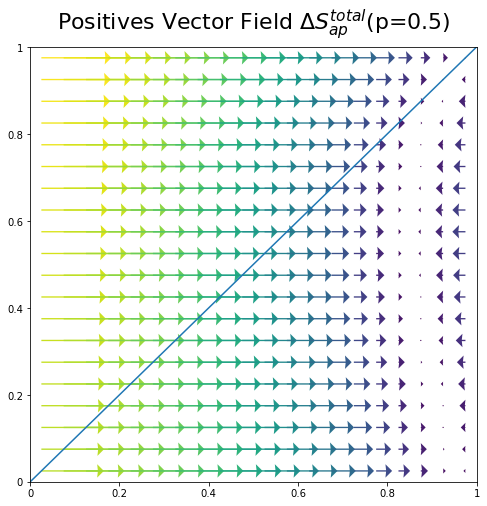

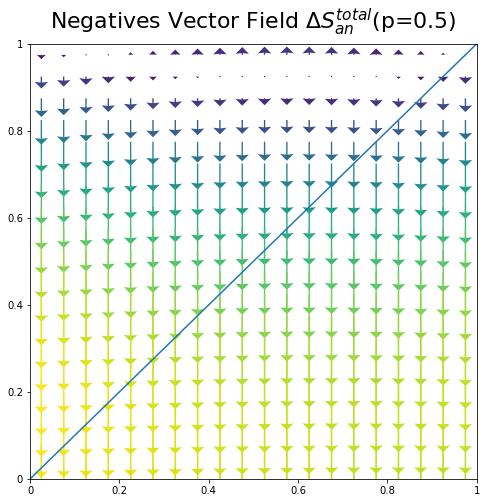

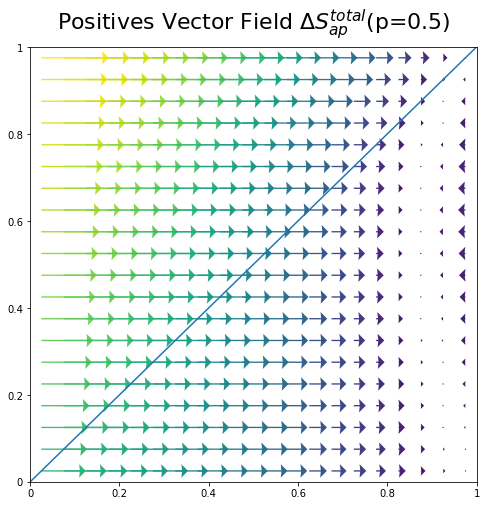

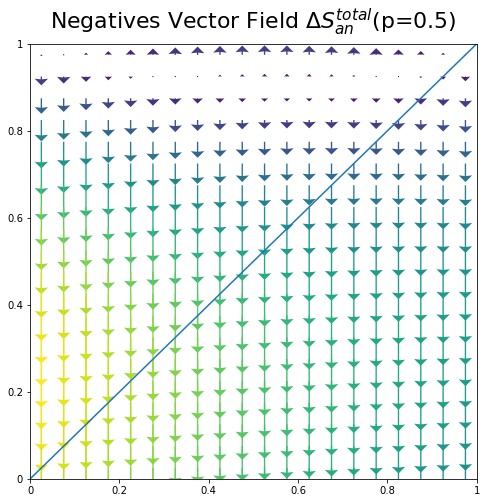

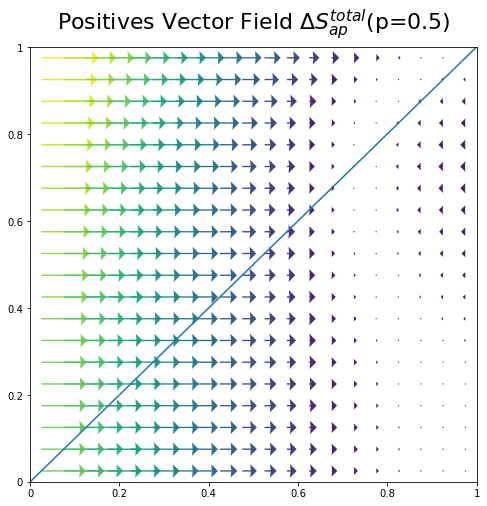

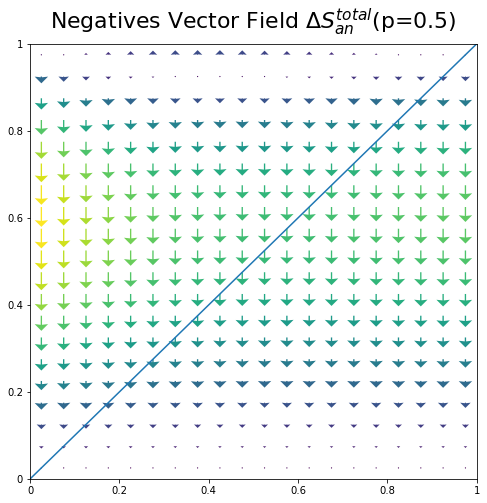

In [6]:
Triplet_Map_std(entanglement=0.5, lr=0.1, N=20, figure_size=8, s=3, title_size=28, save=False)
Triplet_Map_1st(entanglement=0.5, lr=0.1, N=20, figure_size=8, s=1, title_size=28, save=False)
Triplet_Map_2nd(entanglement=0.5, lr=0.1, N=20, figure_size=8, s=1, title_size=28, save=False)